# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [9]:
#import re
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

# df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
#                      columns= iris_data['feature_names'] + ['target'])

# ### target_names = class
# ### target = target
# iris_data.target

# df['class'] = iris_data.target_names[iris_data.target]

# clean_columns = df.columns.str.replace(r"\(.*\)","")
# clean_columns = clean_columns.str.strip()
# df.columns = clean_columns

# === Make this work ===

def create_df():
    df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])
    df['class'] = iris_data.target_names[iris_data.target]

    clean_columns = df.columns.str.replace(r"\(.*\)", "", regex = True)
    clean_columns = clean_columns.str.strip()
    df.columns = clean_columns

    return df  

df_iris = create_df()
#df_iris.sample(n=10)
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [10]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [18]:
#From our data we will only get variable columns as np.array
x = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [22]:
mergings = linkage(x, method = 'complete')
mergings

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

In [23]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

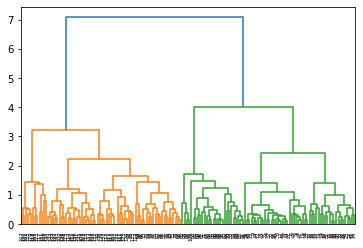

In [26]:
dn = dendrogram(mergings) ### Says labels doesnt have varieties #, labels='varieties', leaf_rotation=90, leaf_font_size=6)
plt.show(dn)

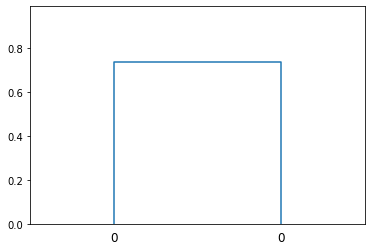

In [27]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [28]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [31]:
model = KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [32]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [36]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [42]:
labels = model.predict(points)
labels

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2])

In [52]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [53]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2

# === Make this work ===
def separate_labels(labels, points):
    data_0 = [i for i in labels if i == 0]
    data_1 = [i for i in labels if i == 1]
    data_2 = [i for i in labels if i == 2]

    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    
    return data_0,data_1,data_2

# for i in labels:
#     print(i)

data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111,)
(94,)
(95,)


In [54]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

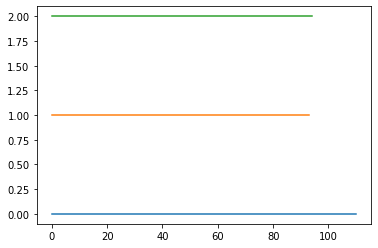

In [61]:
# plotting the data 
for frame in [data_0, data_1, data_2]:
    plt.plot(frame)
plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [78]:
new_labels = model.predict(new_points)
new_labels

array([1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2])

In [66]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [69]:
#separate the data by labels like we did before

new_0 = [i for i in new_labels if i == 0]
new_1 = [i for i in new_labels if i == 1]
new_2 = [i for i in new_labels if i == 2]

new_0 = np.array(new_0)
new_1 = np.array(new_1)
new_2 = np.array(new_2)

In [70]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

<function matplotlib.pyplot.show(close=None, block=None)>

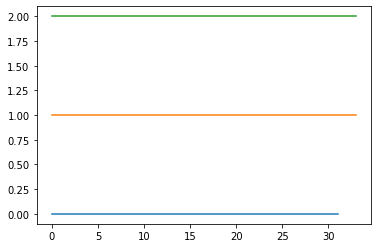

In [73]:
#plot the new labels
for frame in [new_0, new_1, new_2]:
    plt.plot(frame)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

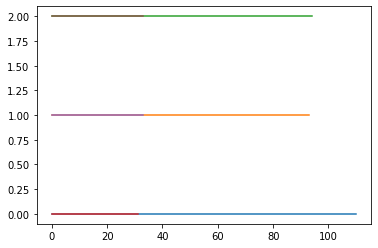

In [77]:
#plot all the points together
for frame in [data_0, data_1, data_2, new_0, new_1, new_2]:
    plt.plot(frame)
plt.show